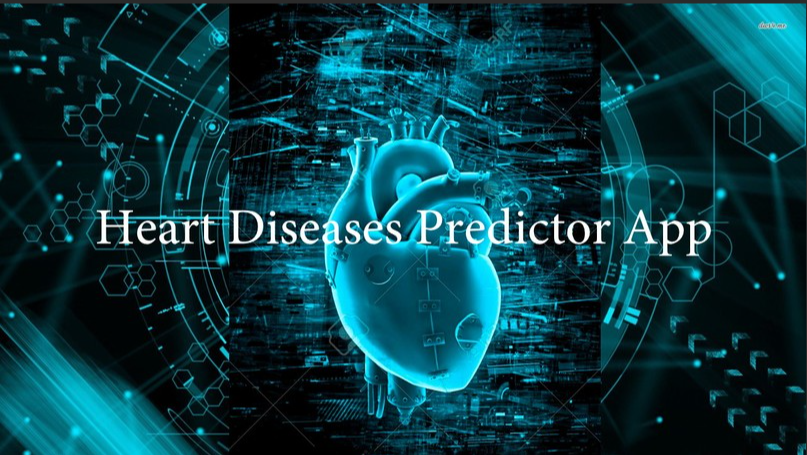

Meaning of Data:

Chest pain

Cholesterol

Output is the amount of blood pumped out by the heart in each beat

Rest ecg EKG and be comfortable before it, no effort

Trtbps resting blood pressure Please measure his pressure while he is comfortable

Thalachh maximum heart rate achieved for a minute

Exng exercise induced angina means you turn it on and load the heart and see whether it will have an angina or not

Old peak is also a certain st wave on the ECG

Thalassemia, Mediterranean anemia

Ca number of major vessels

Slp slope is a wave also on the ECG
Fbs fasting blood sugar Fasting blood sugar

In [73]:
import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # missingno package is helpful for visualizing the missingness.
from scipy.stats import linregress
%matplotlib inline

In [74]:
df=pd.read_csv('/content/heart.csv')

In [75]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

Descriptive columns:

age in years

sex (1 = male; 0 = female)

cp chest pain type

trestbps resting blood pressure (in mm Hg on admission to the hospital)

chol serum cholestoral in mg/dl

fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg resting electrocardiographic results

thalach maximum heart rate achieved

exang exercise induced angina (1 = yes; 0 = no)

oldpeak ST depression induced by exercise relative to rest

slope the slope of the peak exercise ST segment

ca number of major vessels (0-3) colored by flourosopy
thal

Get some Desriptive Statistic about Data

In [76]:
df.shape

(303, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:

df.describe(include='all').style.background_gradient(axis=None, cmap='YlOrRd')
  


Cleaning Data

In [79]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

visualization missing values

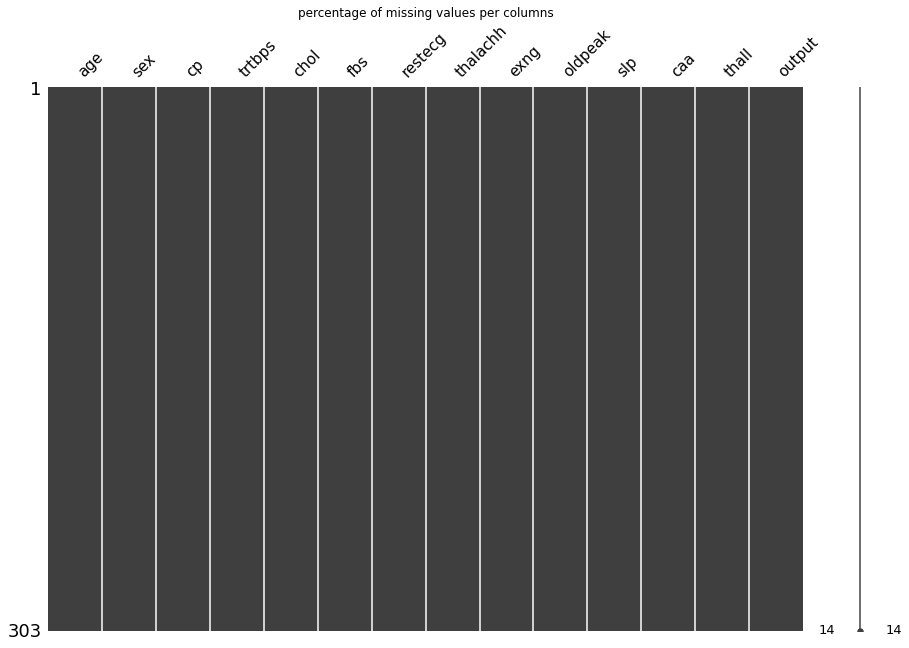

In [80]:
msno.matrix(df,figsize=(15,10),fontsize=15)
plt.title('percentage of missing values per columns')
plt.show()

In [81]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

Visualization Ratio of Patient and heatlh 

Visualization Ratio of Sex

In [82]:
df['output'].value_counts()


1    165
0    138
Name: output, dtype: int64

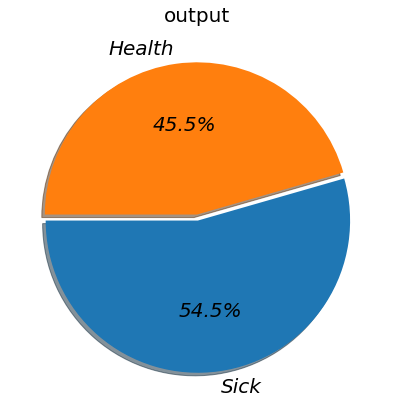

In [83]:
pie=df["output"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["Sick", "Health"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('output', fontsize=20)
plt.show()

Take Report about Data by using pandas progiling

In [11]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [12]:
import pandas_profiling as pp
pp.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Visualization

In [84]:
data=df.copy()

In [85]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [86]:
def x(statue):
    if statue == 1:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
data['output'] = data['output'].apply(x)

In [87]:
def y(sex):
  if sex==1:
    return 'Male'
  else:
    return 'Female'
data['sex'] = data['sex'].apply(y)   

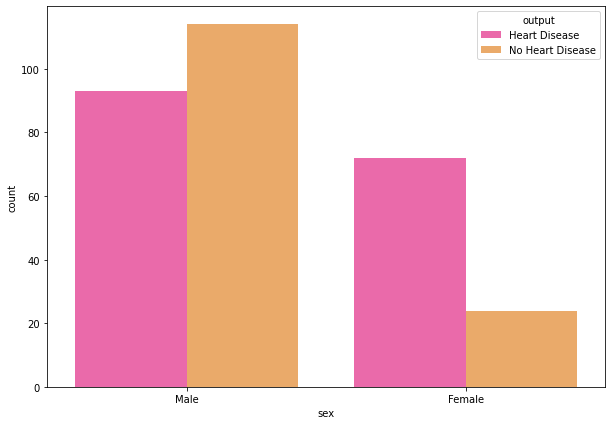

In [88]:
plt.figure(figsize=(10,7))
sns.countplot(x='sex',hue='output',data=data,palette="spring")

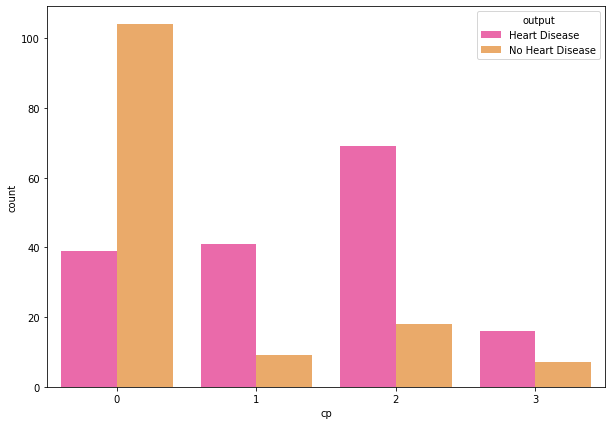

In [89]:
plt.figure(figsize=(10,7))
sns.countplot(x='cp',hue='output',data=data,palette="spring")

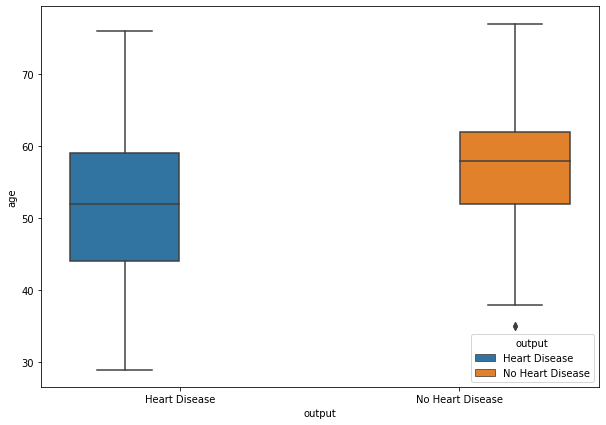

In [90]:
plt.figure(figsize=(10,7))
sns.boxplot(x='output',y='age',hue='output',data=data)

Text(0.5, 1.0, 'The Ratio of chol for patient')

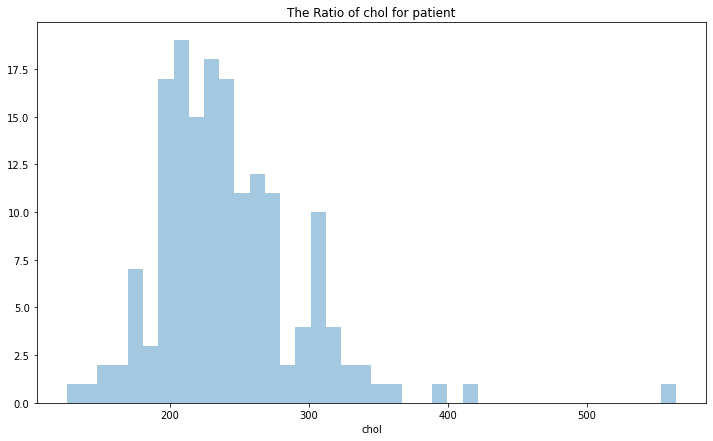

In [96]:
plt.figure(figsize=(12,7))
sns.distplot(df[df['output']==1]['chol'],kde=False,bins=40)
plt.title('The Ratio of chol for patient')

Text(0.5, 1.0, 'The thall distribution for patient')

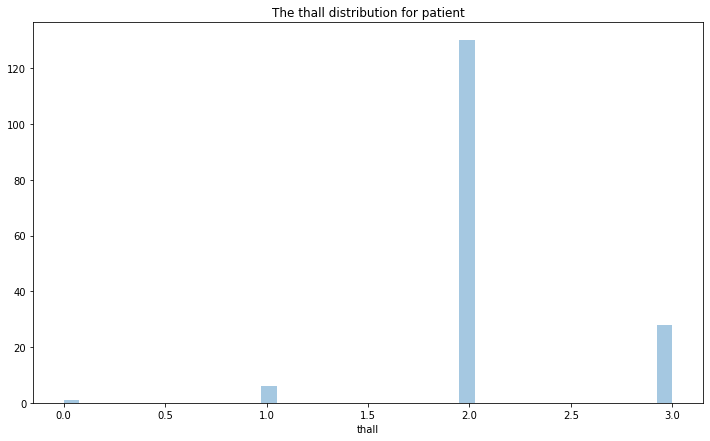

In [98]:
plt.figure(figsize=(12,7))
sns.distplot(df[df['output']==1]['thall'],kde=False,bins=40)
plt.title('The thall distribution for patient')

In [91]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

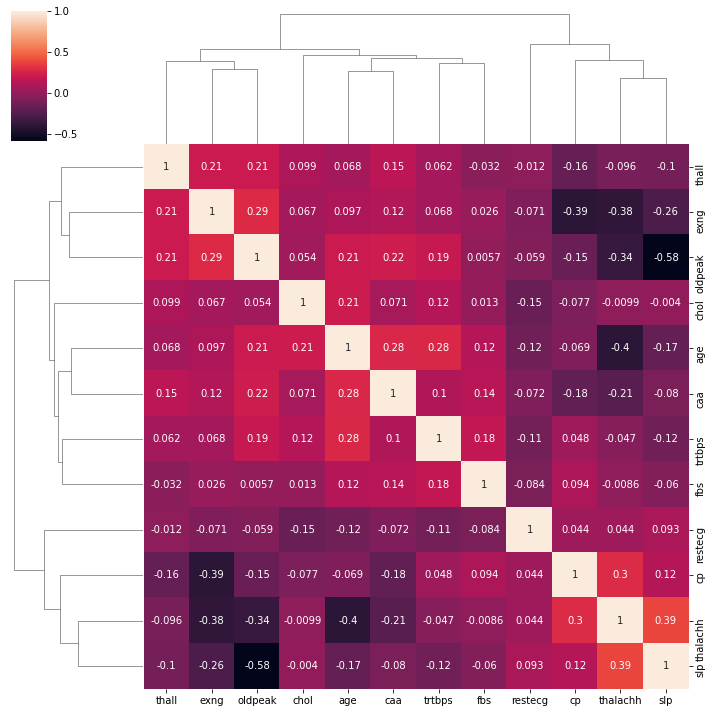

In [19]:
sns.clustermap(data.corr(),annot=True)

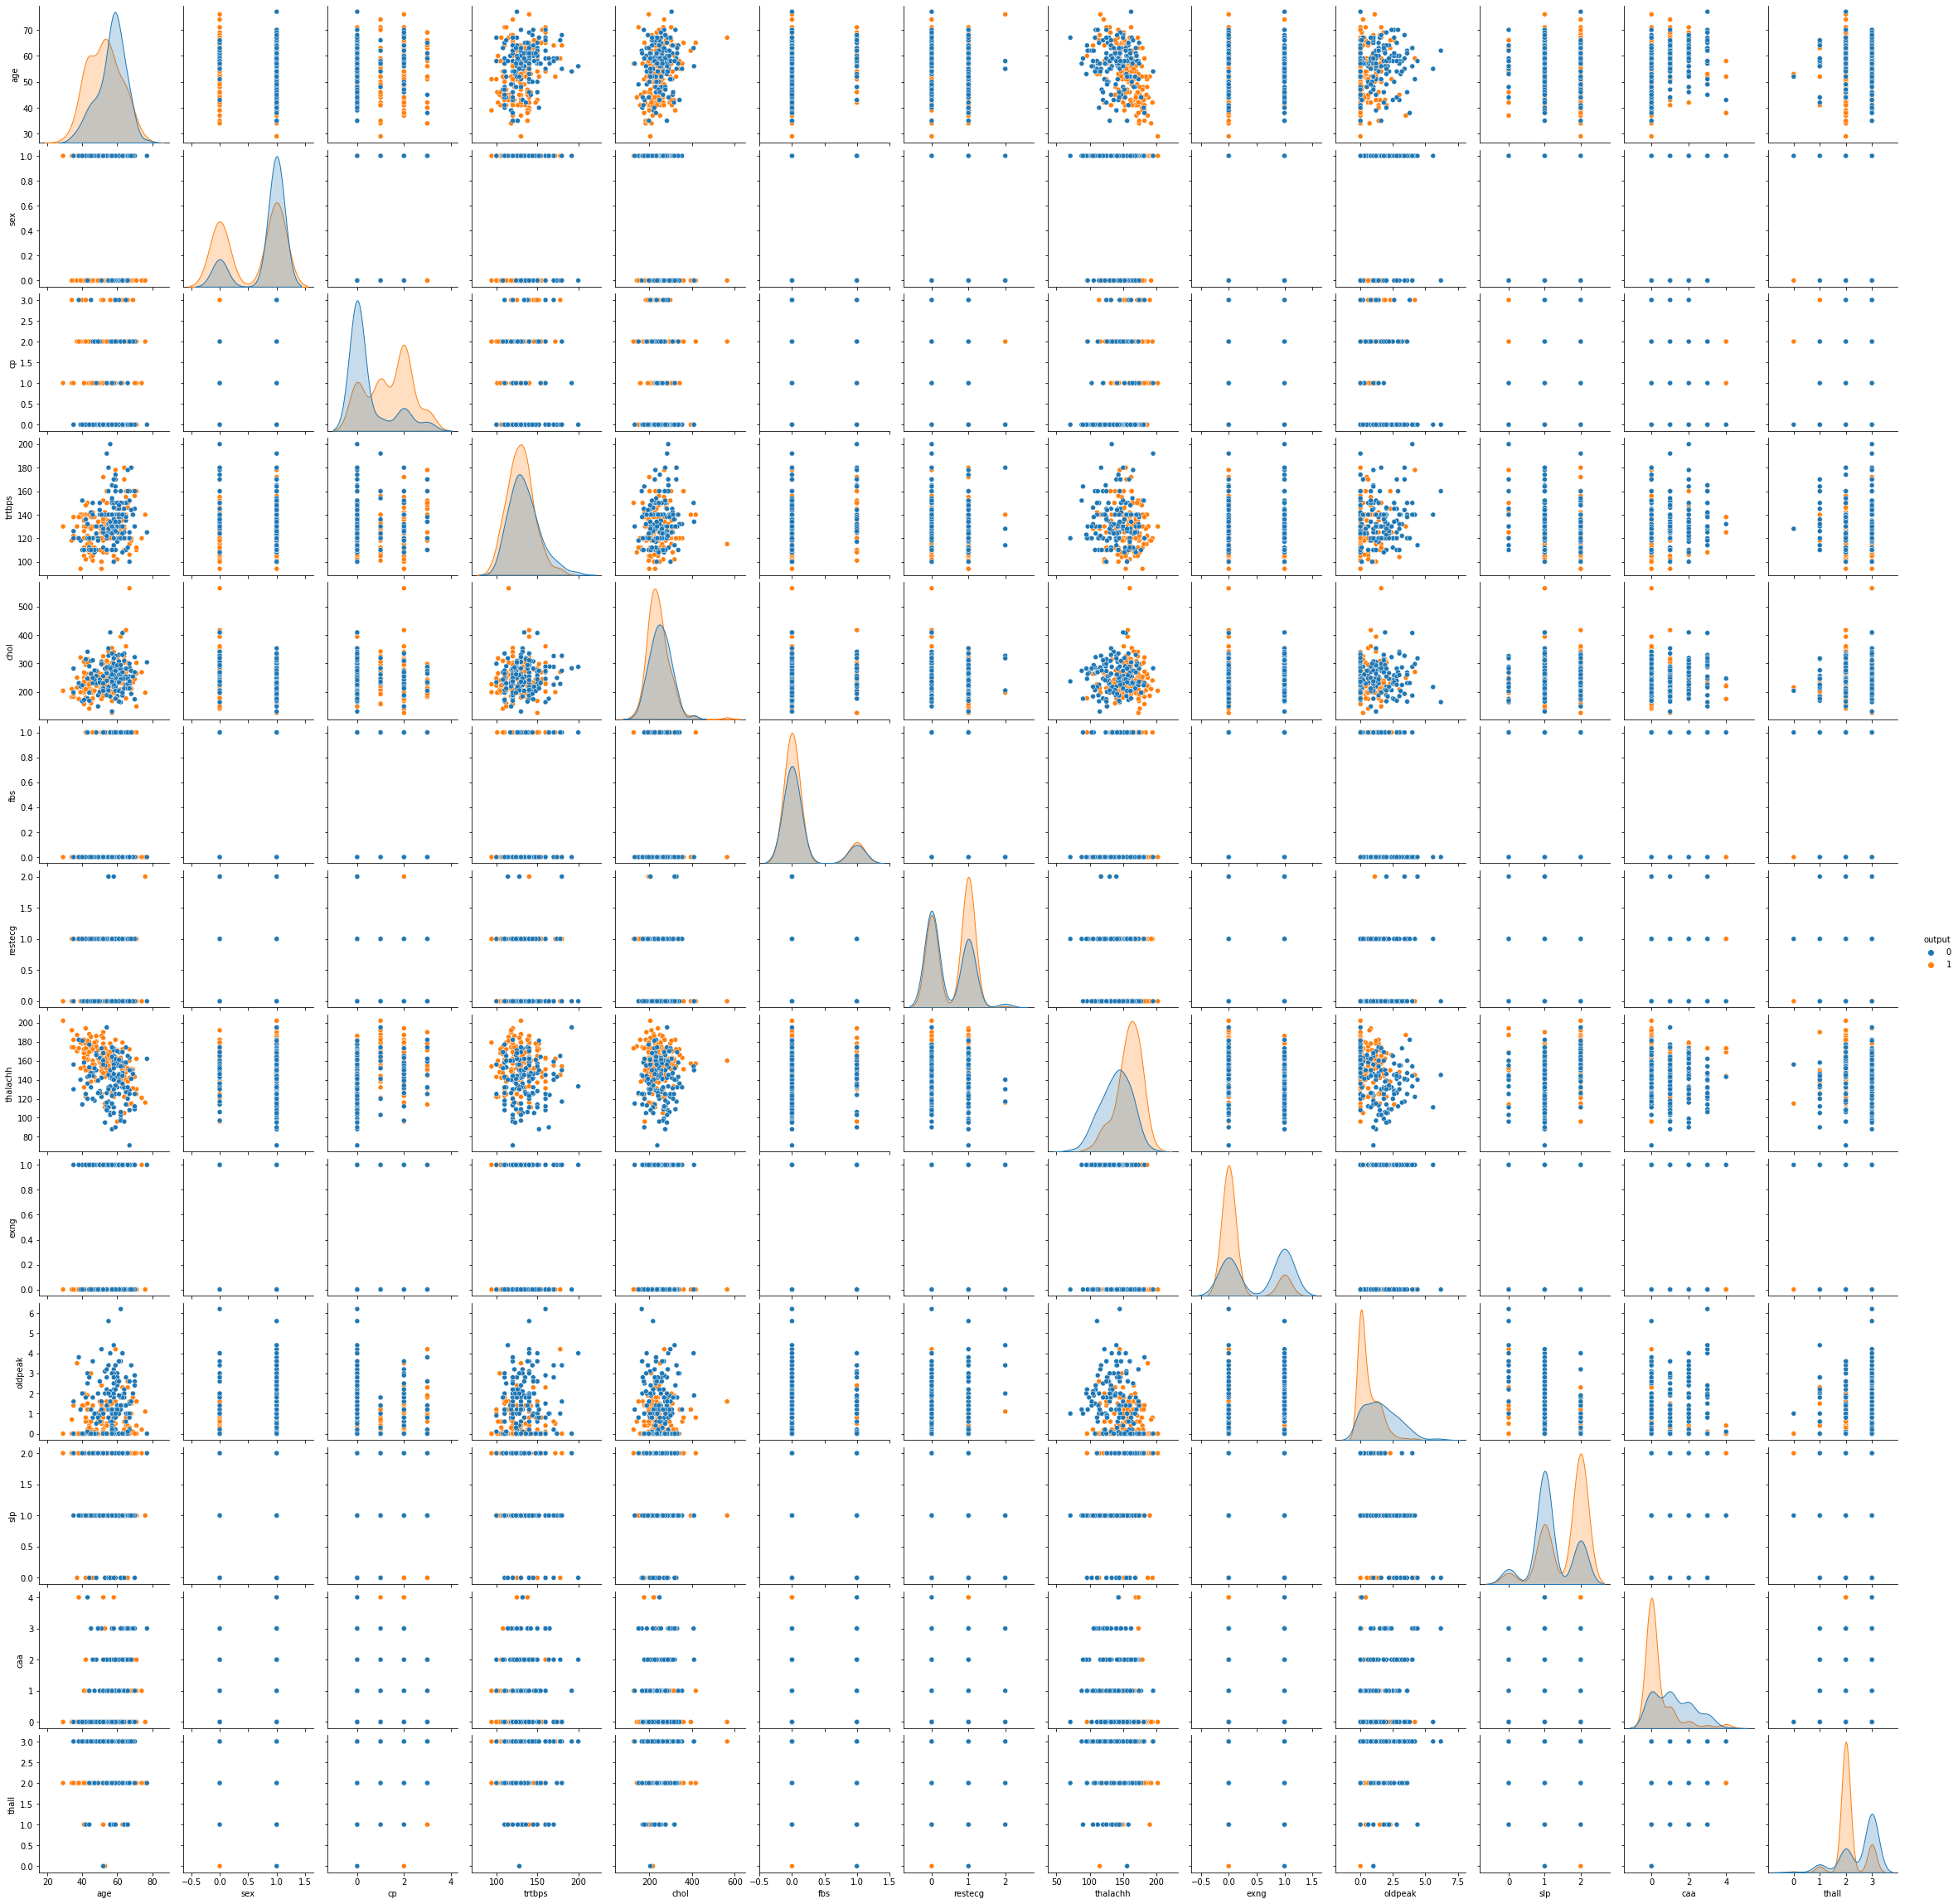

In [20]:
sns.pairplot(df,hue='output')
       

Feature Engineering

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#select all columns
X = data.iloc[:,0:13] 
#select target column 
y = data.iloc[:,-1]   
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score')) 

       Specs       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271


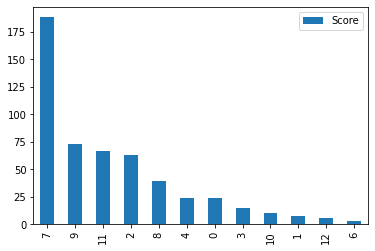

In [50]:
featureScores.nlargest(12,'Score').plot(kind='bar')
plt.show()

Data Preprocessing

Change the name of columns

In [34]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [35]:
data['oldpeak']=data['oldpeak'].astype(int)

In [36]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0        2    0   
1   37    1   2     130   250    0        1       187     0        3    0   
2   41    0   1     130   204    0        0       172     0        1    2   
3   56    1   1     120   236    0        1       178     0        0    2   
4   57    0   0     120   354    0        1       163     1        0    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

change names of columns

In [37]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'output']

In [38]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'output'],
      dtype='object')

In [39]:
#cp - chest_pain_type
data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'


In [40]:
#restecg - rest_ecg_type
data.loc[data['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
data.loc[data['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
data.loc[data['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'


In [41]:
#slope - st_slope_type
data.loc[data['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
data.loc[data['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
data.loc[data['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

In [42]:
#thal - thalassemia_type
data.loc[data['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
data.loc[data['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
data.loc[data['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
data.loc[data['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [43]:
data.head()

age  sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1    typical angina                     145          233   
1   37    1  non-anginal pain                     130          250   
2   41    0   atypical angina                     130          204   
3   56    1   atypical angina                     120          236   
4   57    0      asymptomatic                     120          354   

   fasting_blood_sugar                 rest_ecg_type  max_heart_rate_achieved  \
0                    1  left ventricular hypertrophy                      150   
1                    0                        normal                      187   
2                    0  left ventricular hypertrophy                      172   
3                    0                        normal                      178   
4                    0                        normal                      163   

   exercise_induced_angina  st_depression st_slope_type  num_major_vessels  \
0                        0              2   downsloping                  0   
1                        0              3   downsloping                  0   
2                        0              1     upsloping                  0   
3                        0              0     upsloping                  0   
4                        1              0     upsloping                  0   

  thalassemia_type  output  
0     fixed defect       1  
1           normal       1  
2           normal       1  
3           normal       1  
4           normal       1

Normalization

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [45]:
cols=[]
for col in data.columns:
  if data[col].dtype=='object':
    pass
  else:
    cols.append(col)  

In [46]:
print(cols)

['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'num_major_vessels', 'output']


In [47]:
for col in cols:
    sc = StandardScaler().fit(data[[col]])
    data[col] = sc.transform(data[[col]]) 

Spliting Data

In [48]:
features=['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'num_major_vessels']

In [49]:
lb = LabelEncoder()
y = lb.fit_transform(data.output)
X = data[features]

Implementation Normalization

In [109]:
#norm=MinMaxScaler()
#x=norm.fit_transform(x)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [122]:
from sklearn.svm import LinearSVC,SVC
classifier= LinearSVC()
#fit model
classifier.fit(X_train, Y_train)
#predict
y_predict=classifier.predict(X_test)
#accuracy
norm_accuracy=classifier.score(X_test,Y_test)

In [123]:
print(y_predict)

print(Y_test)

print(norm_accuracy)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]
0.7763157894736842


In [124]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#fit model
classifier.fit(X_train, Y_train)
#predict
y_predict=classifier.predict(X_test)
#accuracy
norm_accuracy=classifier.score(X_test,Y_test)

In [125]:
print(y_predict)

print(Y_test)

print(norm_accuracy)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]
0.7763157894736842
